In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from scipy.stats import logistic
from scipy.stats import norm
from stargazer.stargazer import Stargazer
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
df1 = pd.read_csv("Gini index (World Bank estimate).csv")
df1

,Economy,Year,Economy Code,Gini index
0,Aruba,2022,ABW,NaN
1,Afghanistan,2022,AFG,NaN
2,Angola,2018,AGO,51.3
3,Albania,2020,ALB,29.4
4,Andorra,2022,AND,NaN
...,...,...,...,...
212,Kosovo,2017,XKX,29.0
213,"Yemen, Rep.",2014,YEM,36.7
214,South Africa,2014,ZAF,63.0
215,Zambia,2015,ZMB,57.1


In [3]:
df1.dropna(inplace=True)
df1.columns = ["country", "year", "country_code", "gini"]
df1

,country,year,country_code,gini
2,Angola,2018,AGO,51.3
3,Albania,2020,ALB,29.4
5,United Arab Emirates,2018,ARE,26.0
6,Argentina,2021,ARG,42.0
7,Armenia,2021,ARM,27.9
...,...,...,...,...
212,Kosovo,2017,XKX,29.0
213,"Yemen, Rep.",2014,YEM,36.7
214,South Africa,2014,ZAF,63.0
215,Zambia,2015,ZMB,57.1


In [4]:
df1.year.describe().round(2)

count     155.00
mean     2017.61
std         2.93
min      2010.00
25%      2016.00
50%      2018.00
75%      2020.00
max      2022.00
Name: year, dtype: float64

In [5]:
df2 = pd.read_csv("healthcare-access-and-quality-index.csv")
df2_filtered = df2[df2["Year"] == 2015]
df2_filtered.columns = ["country", "country_code", "year", "HAQ_index"]
df2_filtered

,country,country_code,year,HAQ_index
5,Afghanistan,AFG,2015,32.5
11,Albania,ALB,2015,78.2
17,Algeria,DZA,2015,63.7
23,American Samoa,ASM,2015,63.3
29,Andean Latin America,NaN,2015,64.1
...,...,...,...,...
1307,Western Sub-Saharan Africa,NaN,2015,44.8
1313,World,OWID_WRL,2015,53.7
1319,Yemen,YEM,2015,49.6
1325,Zambia,ZMB,2015,41.6


In [6]:
df3 = pd.read_csv("life-expectancy-vs-healthcare-expenditure.csv")
df3.columns = ["country", "country_code", "year", "lifeexp", "healthexp", "pop", "continent"]
df3.dropna(inplace=True)

In [7]:
df3_filtered = df3[df3["year"]== 2015]
df3_filtered

,country,country_code,year,lifeexp,healthexp,pop,continent
66,Afghanistan,AFG,2015,62.7,211.58730,33753500.0,Asia
661,Albania,ALB,2015,78.6,568.91840,2882482.0,Europe
920,Algeria,DZA,2015,75.6,838.51030,39543148.0,Africa
1293,Andorra,AND,2015,83.0,3096.17300,71766.0,Europe
1552,Angola,AGO,2015,60.7,191.20200,28127724.0,Africa
...,...,...,...,...,...,...,...
57167,Venezuela,VEN,2015,73.0,744.75070,30529722.0,South America
57426,Vietnam,VNM,2015,73.9,344.95898,92191400.0,Asia
58145,Yemen,YEM,2015,65.9,110.01008,28516552.0,Asia
58530,Zambia,ZMB,2015,61.2,152.14185,16248231.0,Africa


In [8]:
data = df3_filtered.merge(df2_filtered, on ="country")
data

,country,country_code_x,year_x,lifeexp,healthexp,pop,continent,country_code_y,year_y,HAQ_index
0,Afghanistan,AFG,2015,62.7,211.58730,33753500.0,Asia,AFG,2015,32.5
1,Albania,ALB,2015,78.6,568.91840,2882482.0,Europe,ALB,2015,78.2
2,Algeria,DZA,2015,75.6,838.51030,39543148.0,Africa,DZA,2015,63.7
3,Andorra,AND,2015,83.0,3096.17300,71766.0,Europe,AND,2015,94.6
4,Angola,AGO,2015,60.7,191.20200,28127724.0,Africa,AGO,2015,40.7
...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,VEN,2015,73.0,744.75070,30529722.0,South America,VEN,2015,64.7
176,Vietnam,VNM,2015,73.9,344.95898,92191400.0,Asia,VNM,2015,66.3
177,Yemen,YEM,2015,65.9,110.01008,28516552.0,Asia,YEM,2015,49.6
178,Zambia,ZMB,2015,61.2,152.14185,16248231.0,Africa,ZMB,2015,41.6


In [9]:
data = data.merge(df1, left_on="country_code_x", right_on ="country_code")
data

,country_x,country_code_x,year_x,lifeexp,healthexp,pop,continent,country_code_y,year_y,HAQ_index,country_y,year,country_code,gini
0,Albania,ALB,2015,78.6,568.91840,2882482.0,Europe,ALB,2015,78.2,Albania,2020,ALB,29.4
1,Algeria,DZA,2015,75.6,838.51030,39543148.0,Africa,DZA,2015,63.7,Algeria,2011,DZA,27.6
2,Angola,AGO,2015,60.7,191.20200,28127724.0,Africa,AGO,2015,40.7,Angola,2018,AGO,51.3
3,Argentina,ARG,2015,76.8,2059.32860,43257064.0,South America,ARG,2015,68.4,Argentina,2021,ARG,42.0
4,Armenia,ARM,2015,74.4,1008.69560,2878598.0,Asia,ARM,2015,67.5,Armenia,2021,ARM,27.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Vanuatu,VUT,2015,69.5,122.69769,276450.0,Oceania,VUT,2015,43.1,Vanuatu,2019,VUT,32.3
146,Vietnam,VNM,2015,73.9,344.95898,92191400.0,Asia,VNM,2015,66.3,Vietnam,2020,VNM,36.8
147,Yemen,YEM,2015,65.9,110.01008,28516552.0,Asia,YEM,2015,49.6,"Yemen, Rep.",2014,YEM,36.7
148,Zambia,ZMB,2015,61.2,152.14185,16248231.0,Africa,ZMB,2015,41.6,Zambia,2015,ZMB,57.1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_x       150 non-null    object 
 1   country_code_x  150 non-null    object 
 2   year_x          150 non-null    int64  
 3   lifeexp         150 non-null    float64
 4   healthexp       150 non-null    float64
 5   pop             150 non-null    float64
 6   continent       150 non-null    object 
 7   country_code_y  150 non-null    object 
 8   year_y          150 non-null    int64  
 9   HAQ_index       150 non-null    float64
 10  country_y       150 non-null    object 
 11  year            150 non-null    int64  
 12  country_code    150 non-null    object 
 13  gini            150 non-null    float64
dtypes: float64(5), int64(3), object(6)
memory usage: 16.5+ KB


In [11]:
data.describe().round(2)

,year_x,lifeexp,healthexp,pop,year_y,HAQ_index,year,gini
count,150.0,150.00,150.00,1.500000e+02,150.0,150.00,150.00,150.00
mean,2015.0,71.30,1313.81,4.724450e+07,2015.0,63.42,2017.73,37.02
std,0.0,8.07,1699.28,1.608751e+08,0.0,16.65,2.87,7.70
min,2015.0,51.10,35.94,4.942600e+04,2015.0,35.70,2010.00,23.20
25%,2015.0,64.70,191.99,3.042914e+06,2015.0,48.70,2016.00,31.72
50%,2015.0,73.00,621.43,1.046482e+07,2015.0,62.30,2018.00,35.85
75%,2015.0,77.50,1676.01,3.546920e+07,2015.0,77.42,2020.00,40.90
max,2015.0,83.90,9392.07,1.393715e+09,2015.0,93.60,2022.00,63.00


In [12]:
# checking for missing values
data.isna().describe()

,country_x,country_code_x,year_x,lifeexp,healthexp,pop,continent,country_code_y,year_y,HAQ_index,country_y,year,country_code,gini
count,150,150,150,150,150,150,150,150,150,150,150,150,150,150
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,150,150,150,150,150,150,150,150,150,150,150,150,150,150


In [13]:
clean_data = data.drop(["year_x", "pop", "country_code_x", "year_y", "country_y", "country_code_y", "country_code", "year"], axis= 1)
clean_data

,country_x,lifeexp,healthexp,continent,HAQ_index,gini
0,Albania,78.6,568.91840,Europe,78.2,29.4
1,Algeria,75.6,838.51030,Africa,63.7,27.6
2,Angola,60.7,191.20200,Africa,40.7,51.3
3,Argentina,76.8,2059.32860,South America,68.4,42.0
4,Armenia,74.4,1008.69560,Asia,67.5,27.9
...,...,...,...,...,...,...
145,Vanuatu,69.5,122.69769,Oceania,43.1,32.3
146,Vietnam,73.9,344.95898,Asia,66.3,36.8
147,Yemen,65.9,110.01008,Asia,49.6,36.7
148,Zambia,61.2,152.14185,Africa,41.6,57.1


In [14]:
# rename and sort columns
clean_data.columns =  ["country", "lifeexp", "healthexp", "continent", "haq", "gini"]
clean_data = clean_data[["country", "continent", "gini", "lifeexp", "healthexp", "haq"]]
clean_data

,country,continent,gini,lifeexp,healthexp,haq
0,Albania,Europe,29.4,78.6,568.91840,78.2
1,Algeria,Africa,27.6,75.6,838.51030,63.7
2,Angola,Africa,51.3,60.7,191.20200,40.7
3,Argentina,South America,42.0,76.8,2059.32860,68.4
4,Armenia,Asia,27.9,74.4,1008.69560,67.5
...,...,...,...,...,...,...
145,Vanuatu,Oceania,32.3,69.5,122.69769,43.1
146,Vietnam,Asia,36.8,73.9,344.95898,66.3
147,Yemen,Asia,36.7,65.9,110.01008,49.6
148,Zambia,Africa,57.1,61.2,152.14185,41.6


In [15]:
# checking for any aggregate values (e.g Europe, World etc) left in the data
country_list = clean_data.country.tolist()
country_list

['Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Lithuania'

In [16]:
# descriptive statistics by continent
clean_data.groupby("continent").agg({"gini" : "mean",
                                     "lifeexp" : "mean",
                                     "healthexp":"mean",
                                     "haq":"mean",
                                     "continent" : "count"}
                                     ).round(2)

,gini,lifeexp,healthexp,haq,continent
continent,,,,,
Africa,41.45,62.65,290.03,47.92,48
Asia,34.12,73.08,819.44,63.42,32
Europe,30.74,78.72,2946.27,82.94,40
North America,44.14,74.23,1805.56,64.22,12
Oceania,34.44,70.33,744.27,55.03,9
South America,44.66,75.28,1190.26,66.61,9


In [17]:
clean_data.describe().round(2)

,gini,lifeexp,healthexp,haq
count,150.00,150.00,150.00,150.00
mean,37.02,71.30,1313.81,63.42
std,7.70,8.07,1699.28,16.65
min,23.20,51.10,35.94,35.70
25%,31.72,64.70,191.99,48.70
50%,35.85,73.00,621.43,62.30
75%,40.90,77.50,1676.01,77.42
max,63.00,83.90,9392.07,93.60


In [18]:
# Checking top and bottom values

gini_max = clean_data.sort_values(by="gini", ascending = False).head(1).iloc[0,0]
gini_max_value = clean_data.sort_values(by="gini", ascending = False).head(1).iloc[0,2]
gini_min = clean_data.sort_values(by="gini", ascending = True).head(1).iloc[0,0]
gini_min_value = clean_data.sort_values(by="gini", ascending = True).head(1).iloc[0,2]
print(f"Max Gini country: {gini_max} with {gini_max_value}")
print(f"Min Gini country: {gini_min} with {gini_min_value}")

Max Gini country: South Africa with 63.0
Min Gini country: Slovakia with 23.2


In [19]:
lifeexp_max = clean_data.sort_values(by="lifeexp", ascending = False).head(1).iloc[0,0]
lifeexp_max_value = clean_data.sort_values(by="lifeexp", ascending = False).head(1).iloc[0,3]
lifeexp_min = clean_data.sort_values(by="lifeexp", ascending = True).head(1).iloc[0,0]
lifeexp_min_value = clean_data.sort_values(by="lifeexp", ascending = True).head(1).iloc[0,3]
print(f"Max Life expectancy country: {lifeexp_max} with {lifeexp_max_value}")
print(f"Min Life expectancy country: {lifeexp_min} with {lifeexp_min_value}")

Max Life expectancy country: Japan with 83.9
Min Life expectancy country: Lesotho with 51.1


In [20]:
healtexp_max = clean_data.sort_values(by="healthexp", ascending = False).head(1).iloc[0,0]
healtexp_max_value = clean_data.sort_values(by="healthexp", ascending = False).head(1).iloc[0,4]
healthexp_min = clean_data.sort_values(by="healthexp", ascending = True).head(1).iloc[0,0]
healthexp_min_value = clean_data.sort_values(by="healthexp", ascending = True).head(1).iloc[0,4]
print(f"Max Health expenses country: {healtexp_max} with {healtexp_max_value}")
print(f"Min Health expenses country: {healthexp_min} with {healthexp_min_value}")

Max Health expenses country: United States with 9392.066
Min Health expenses country: Democratic Republic of Congo with 35.939266


In [21]:
haq_max = clean_data.sort_values(by="haq", ascending = False).head(1).iloc[0,0]
haq_max_value = clean_data.sort_values(by="haq", ascending = False).head(1).iloc[0,5]
haq_min = clean_data.sort_values(by="haq", ascending = True).head(1).iloc[0,0]
haq_min_value = clean_data.sort_values(by="haq", ascending = True).head(1).iloc[0,5]
print(f"Max HAQ country: {haq_max} with {haq_max_value}")
print(f"Min HAQ country: {haq_min} with {haq_min_value}")

Max HAQ country: Iceland with 93.6
Min HAQ country: Lesotho with 35.7


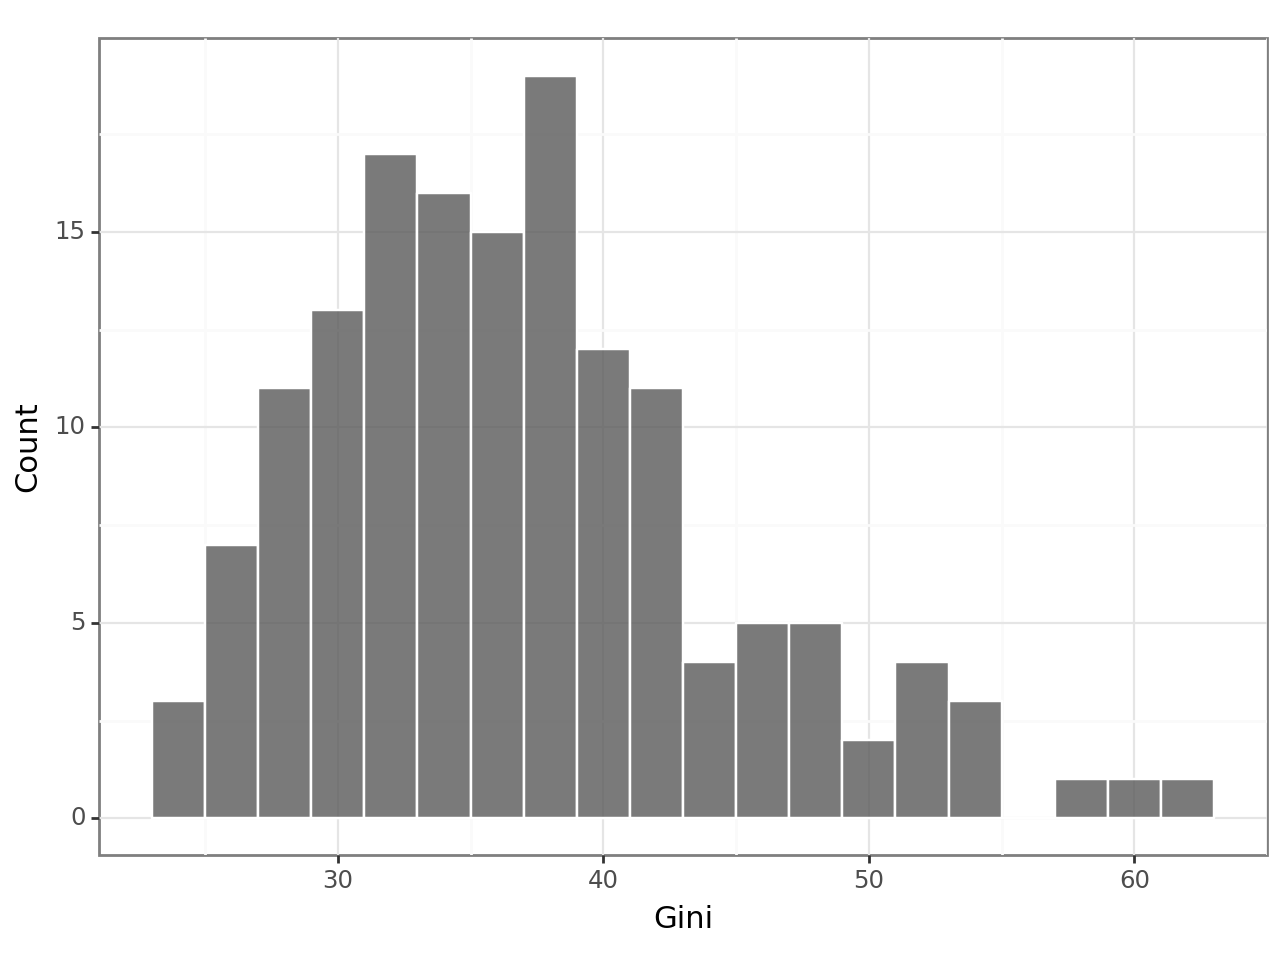

<Figure Size: (640 x 480)>

In [22]:
(
    ggplot(clean_data, aes(x="gini"))
    + geom_histogram(
        aes(y="..count.."),
        binwidth=2,
        boundary=1,
        color="white",
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Gini", y="Count")
    + theme_bw()
)

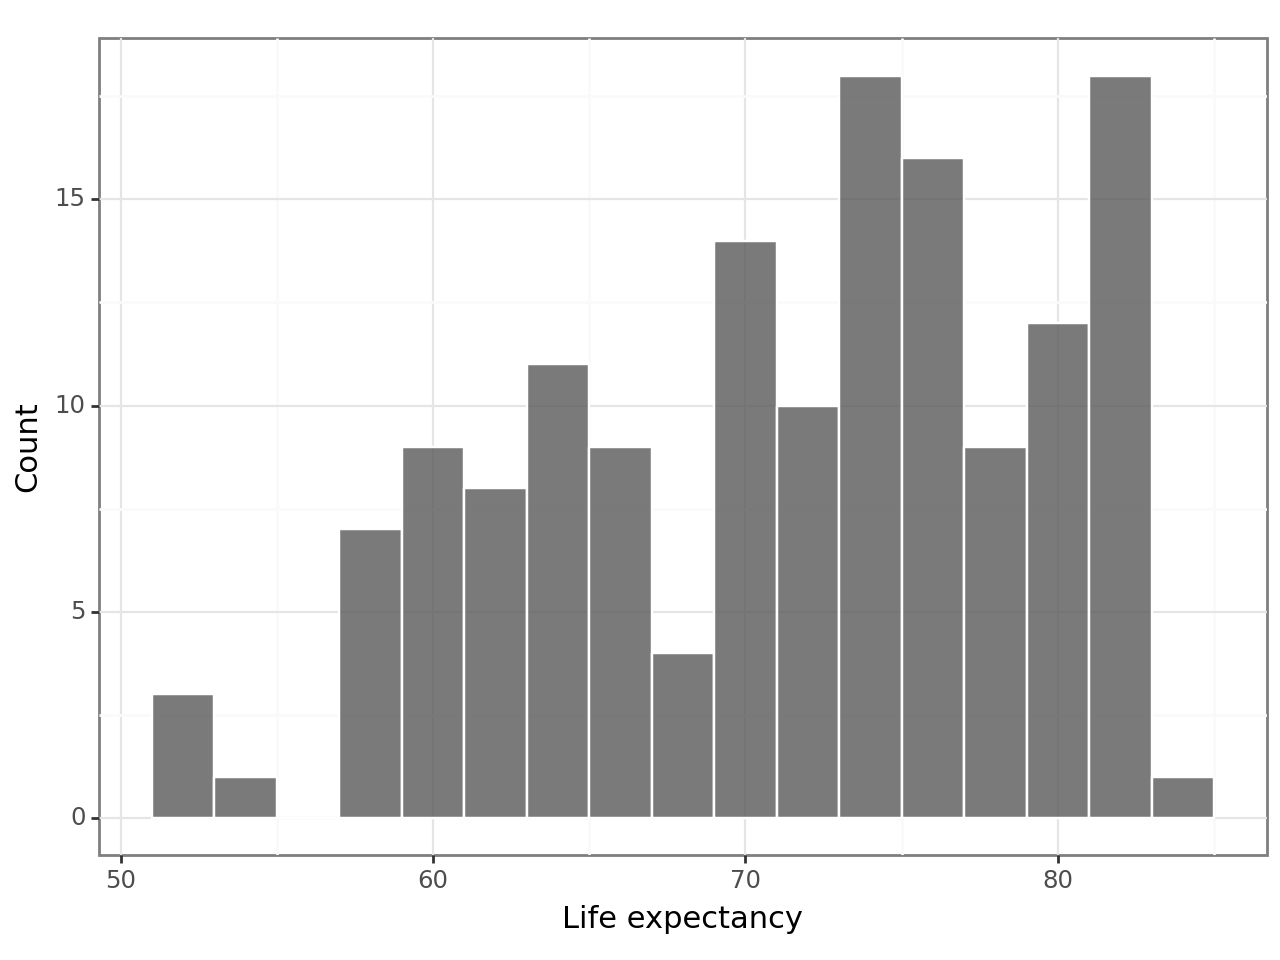

<Figure Size: (640 x 480)>

In [23]:
(
    ggplot(clean_data, aes(x="lifeexp"))
    + geom_histogram(
        aes(y="..count.."),
        binwidth=2,
        boundary=1,
        color="white",
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Life expectancy", y="Count")
    + theme_bw()
)

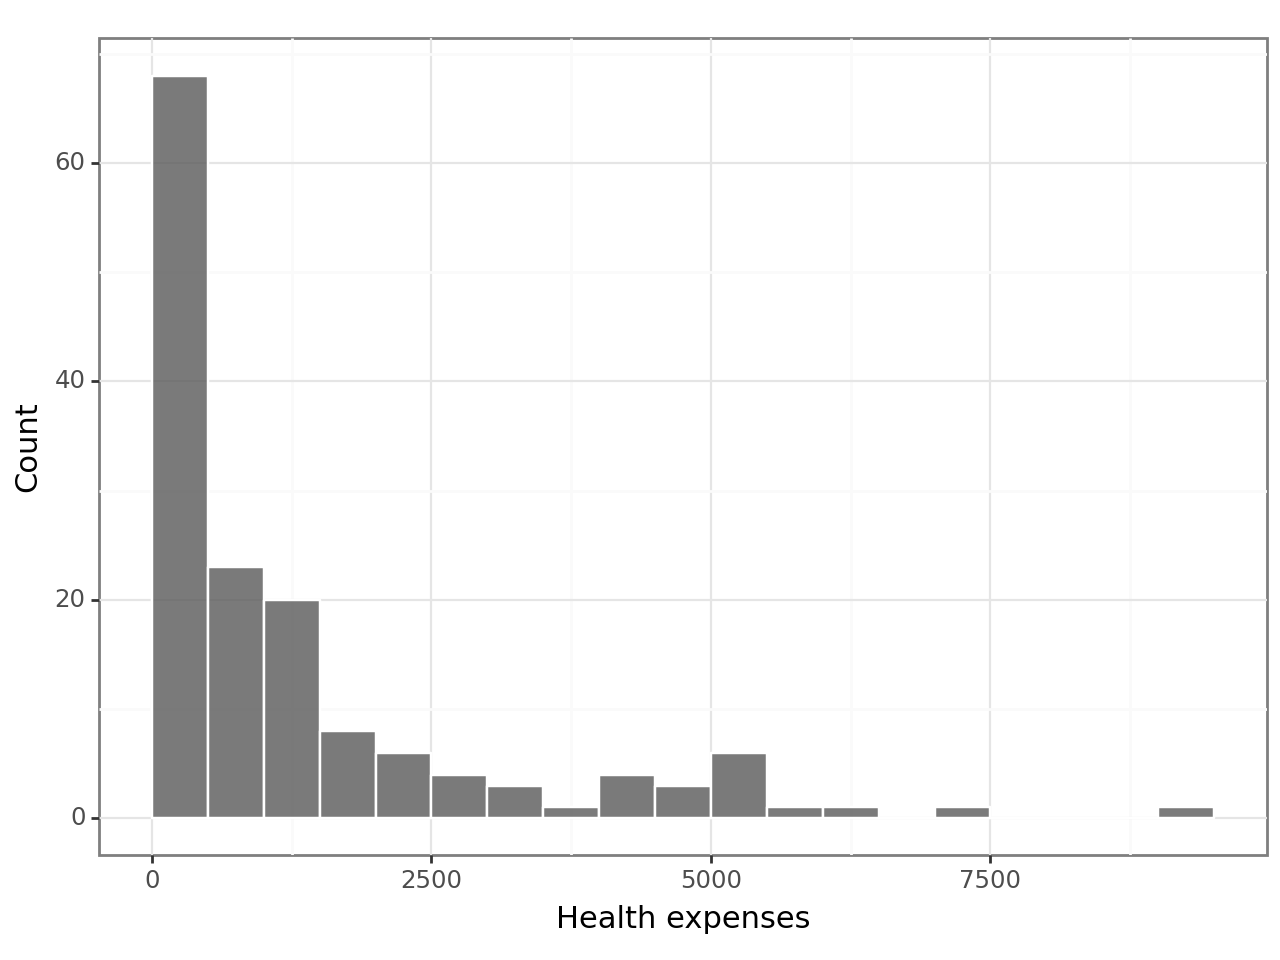

<Figure Size: (640 x 480)>

In [24]:
(
    ggplot(clean_data, aes(x="healthexp"))
    + geom_histogram(
        aes(y="..count.."),
        binwidth=500,
        boundary=1,
        color="white",
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Health expenses", y="Count")
    + theme_bw()
)

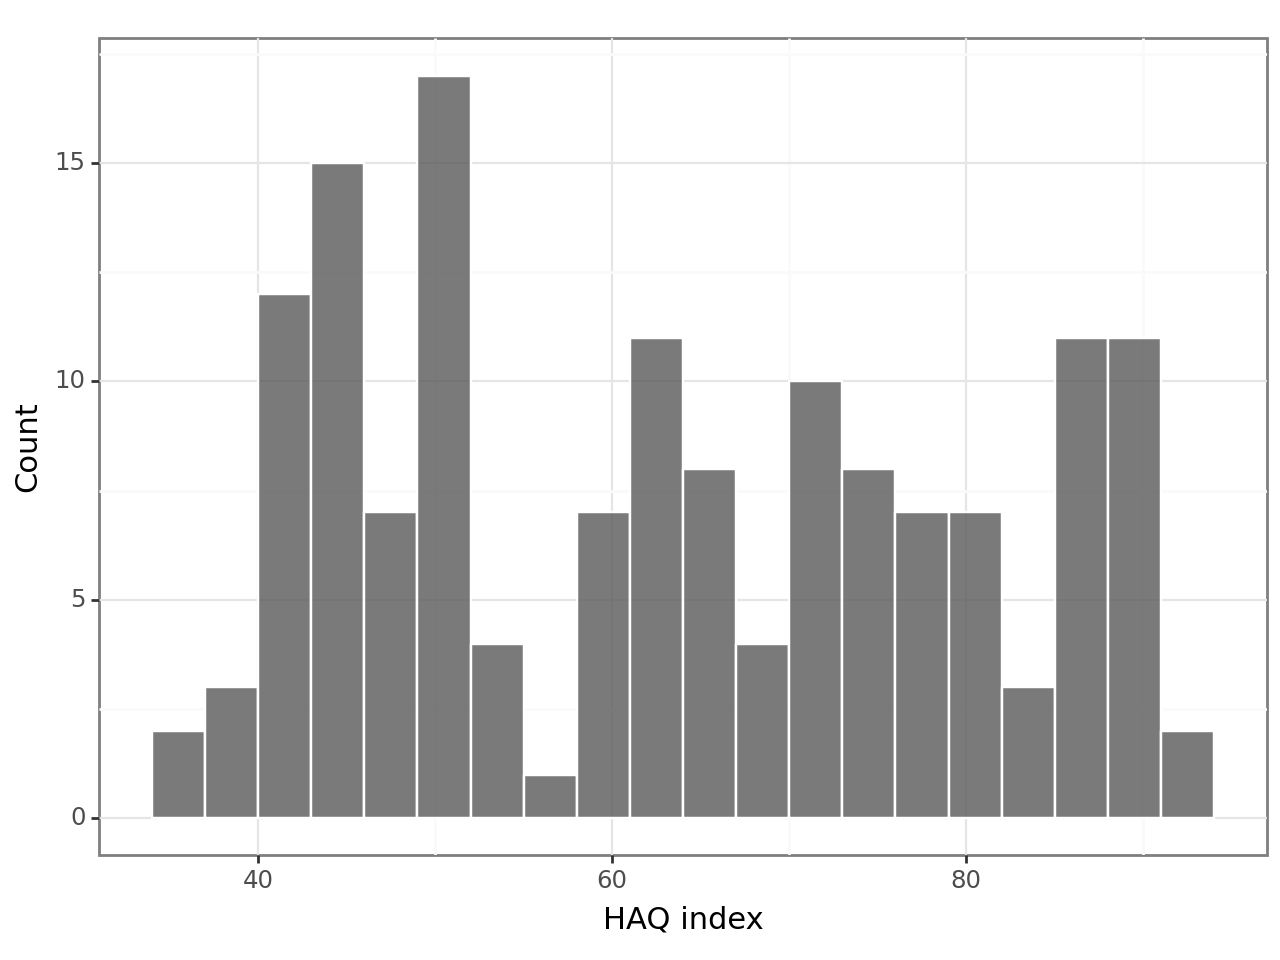

<Figure Size: (640 x 480)>

In [25]:
(
    ggplot(clean_data, aes(x="haq"))
    + geom_histogram(
        aes(y="..count.."),
        binwidth=3,
        boundary=1,
        color="white",
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="HAQ index", y="Count")
    + theme_bw()
)

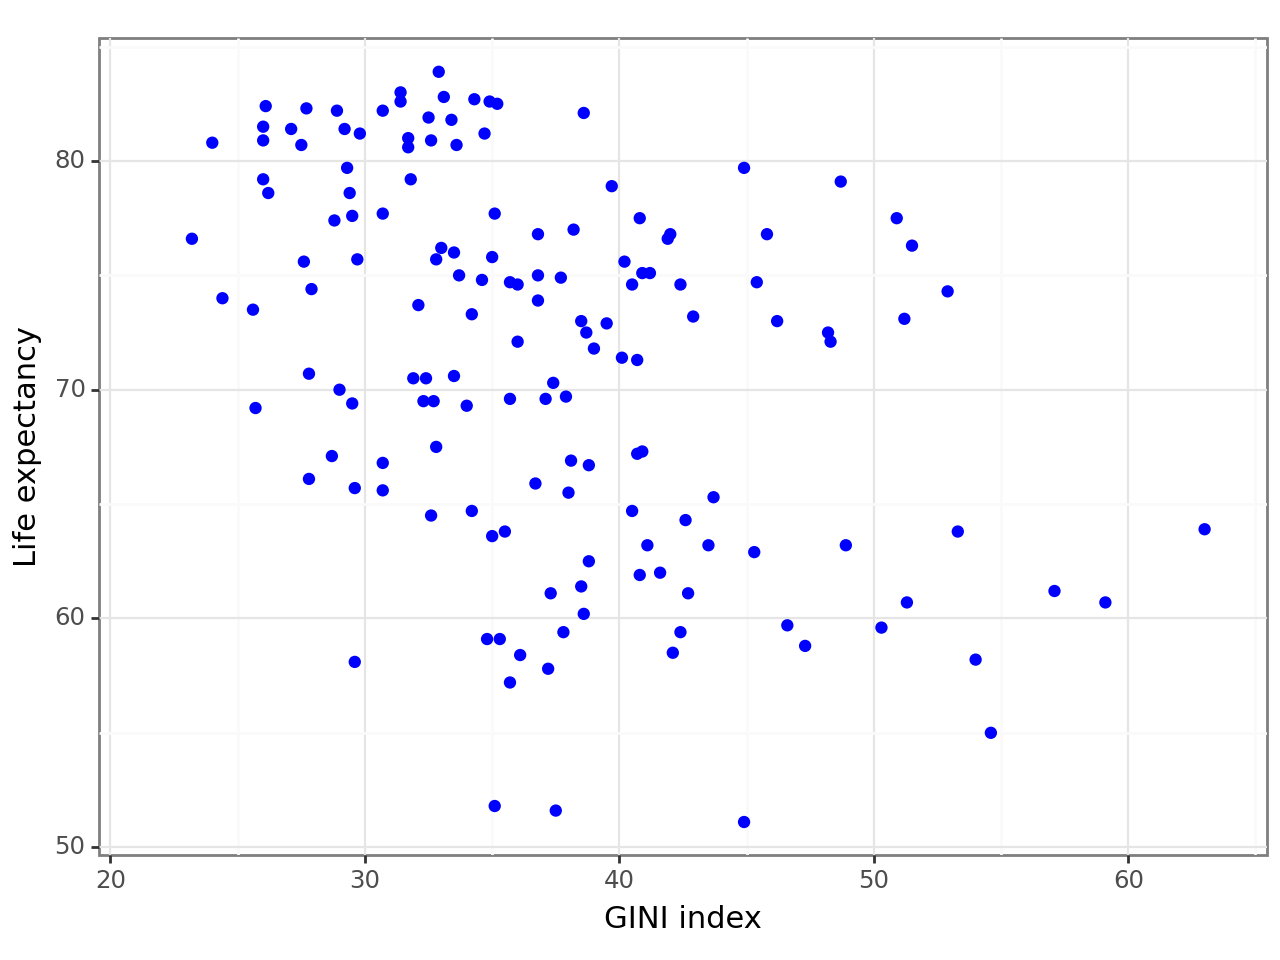

In [26]:
p1 = (
    ggplot(clean_data, aes(x="gini", y="lifeexp"))
    + geom_point(color="blue")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[20, 65])
    + scale_y_continuous(expand=[0.01, 0.01], limits=[50, 85])
    + labs(x="GINI index", y="Life expectancy")
    + theme_bw()
)
print(p1)

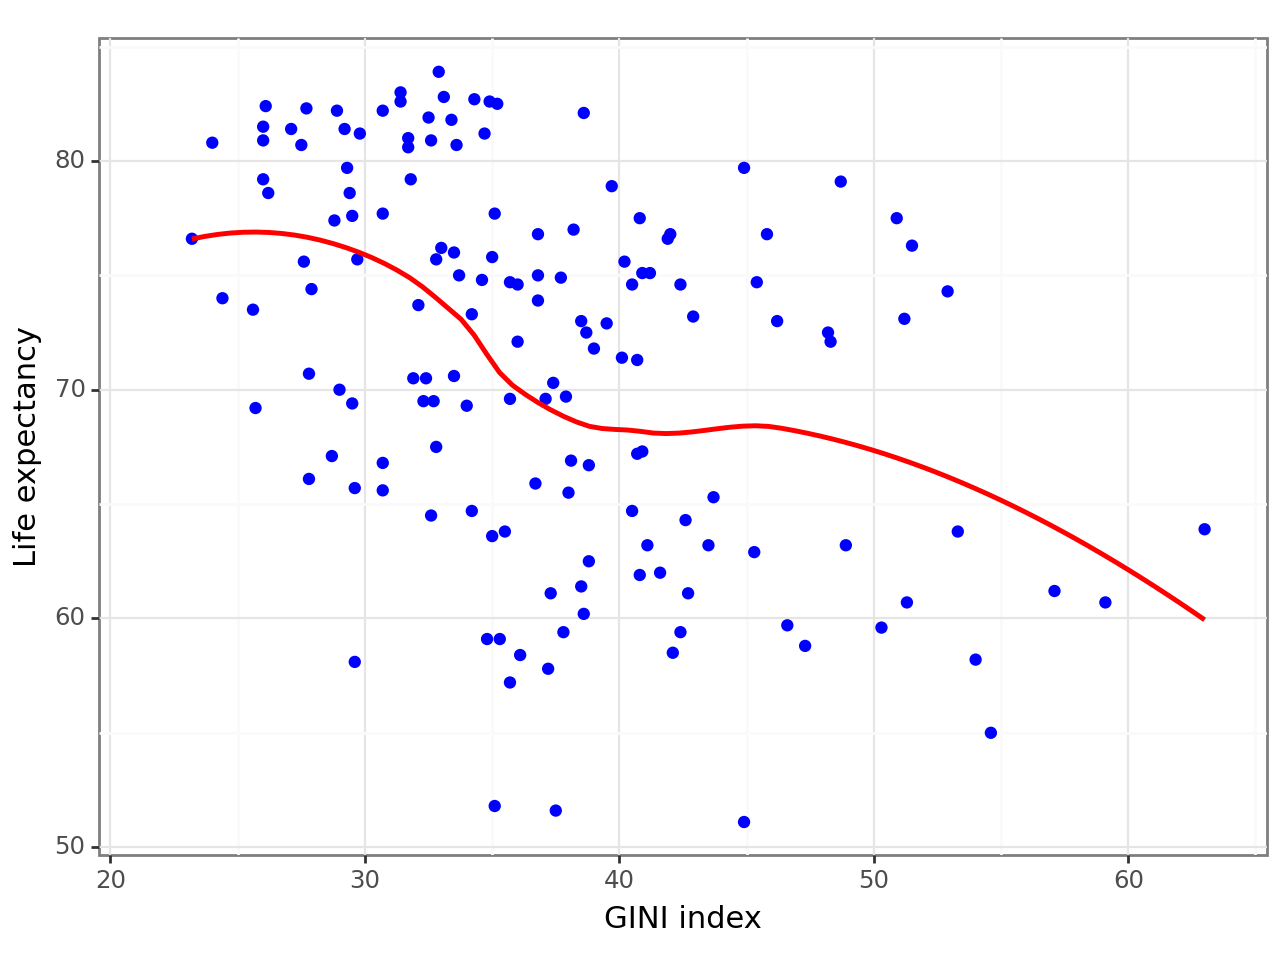

In [27]:
lowess = p1 + geom_smooth(method="loess", color="red", se=False)
print(lowess)


#### Negative connection between GINI and life expectancy: countries with higher GINI indexes (i.e. more unequal distribution of wealth) tend to have lower life expectancy. 
Complicated pattern: flat at first, then shard decline between 30-35, then flattens out again until 45, then stable decline

Linear model looks to be a good fit.

In [28]:
reg1 = smf.ols(formula="lifeexp~gini", data=clean_data).fit(cov_type="HC1")
stargazer = Stargazer([reg1])
stargazer.rename_covariates({"lifeexp" : "Life expectancy", "gini" : "GINI index", "Intercept": "Constant"})
stargazer

In [29]:
# Countries with a GINI of 0 have a life expectancy of 87.5 years in our data. 
# Countries with a 1 point higher GINI index tend to have 0.438 years lower life expectancy on average in our data.
# Covariates significant at 1%. The variation in GINI explains 17.5% of variation in life expectancy shown by the R squared.
# This is not bad overall, but a non linear might produce better results.

In [30]:
clean_data["gini_sq"] = clean_data["gini"]**2
clean_data["gini_cu"] = clean_data["gini"]**3
reg2 = smf.ols(formula="lifeexp ~ gini_sq", data=clean_data).fit(cov_type="HC1")
reg3 = smf.ols(formula="lifeexp ~ gini_cu", data=clean_data).fit(cov_type="HC1")
stargazer = Stargazer([reg1, reg2, reg3])
stargazer.rename_covariates({"lifeexp" : "Life expectancy", "gini" : "GINI index", "gini_sq" : "GINI index squared", "gini_cu" : "GINI index cubed", "Intercept": "Constant"})
stargazer

C:\Users\User\AppData\Local\Temp\ipykernel_3268\3925387994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\AppData\Local\Temp\ipykernel_3268\3925387994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
# linear looks to be the best fit overall based on R squared values.

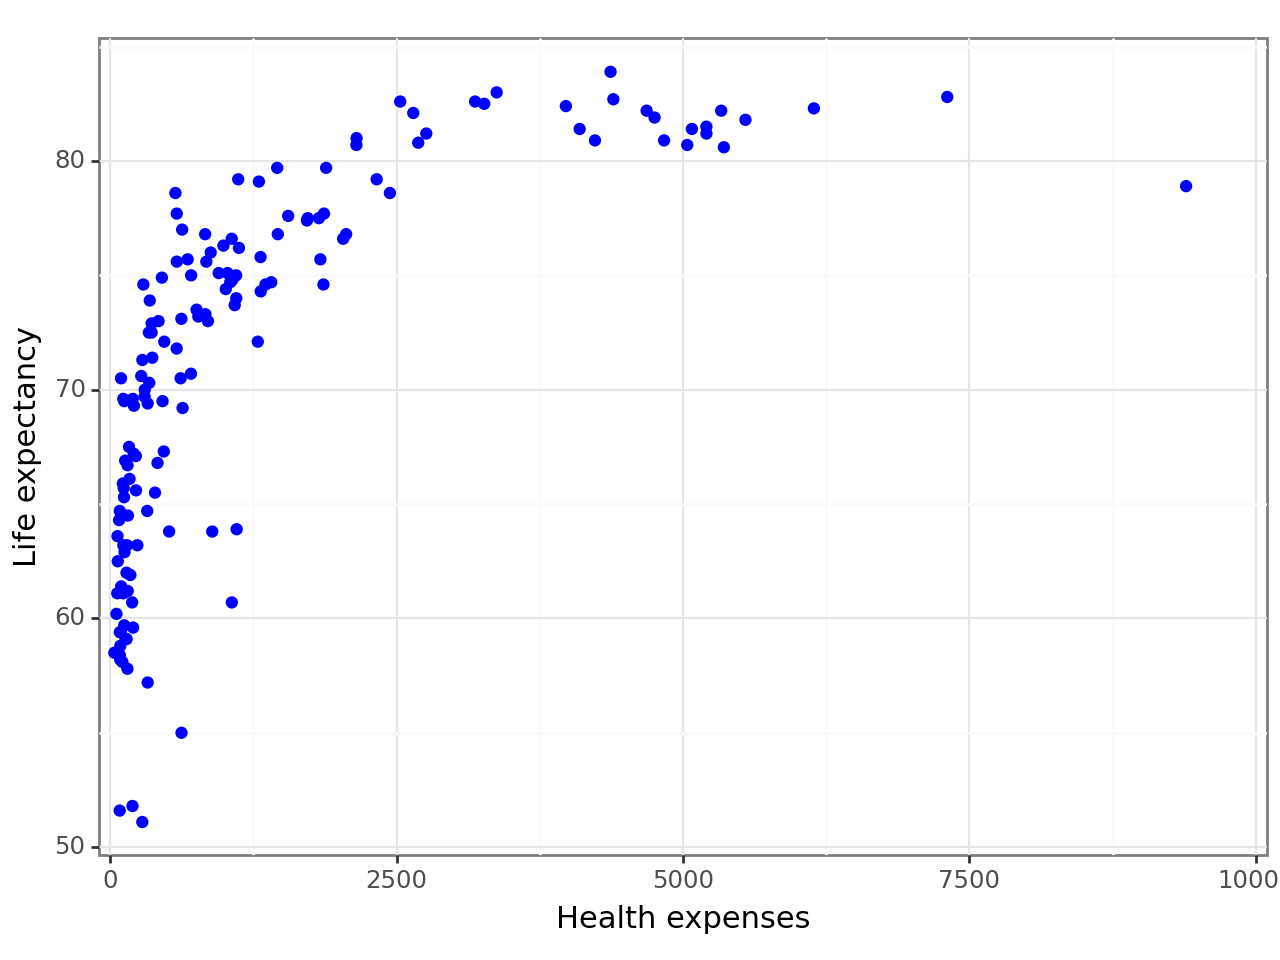

In [32]:
# checking out healthexp variable vs lifeexp
p2 = (
    ggplot(clean_data, aes(x="healthexp", y="lifeexp"))
    + geom_point(color="blue")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[0, 10000])
    + scale_y_continuous(expand=[0.01, 0.01], limits=[50, 85])
    + labs(x="Health expenses", y="Life expectancy")
    + theme_bw()
)
print(p2)

In [33]:
# non linear relationship, converting to ln healthexp to get linearity

In [34]:
clean_data["ln_healthexp"] = np.log(clean_data["healthexp"])

C:\Users\User\AppData\Local\Temp\ipykernel_3268\1915571462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


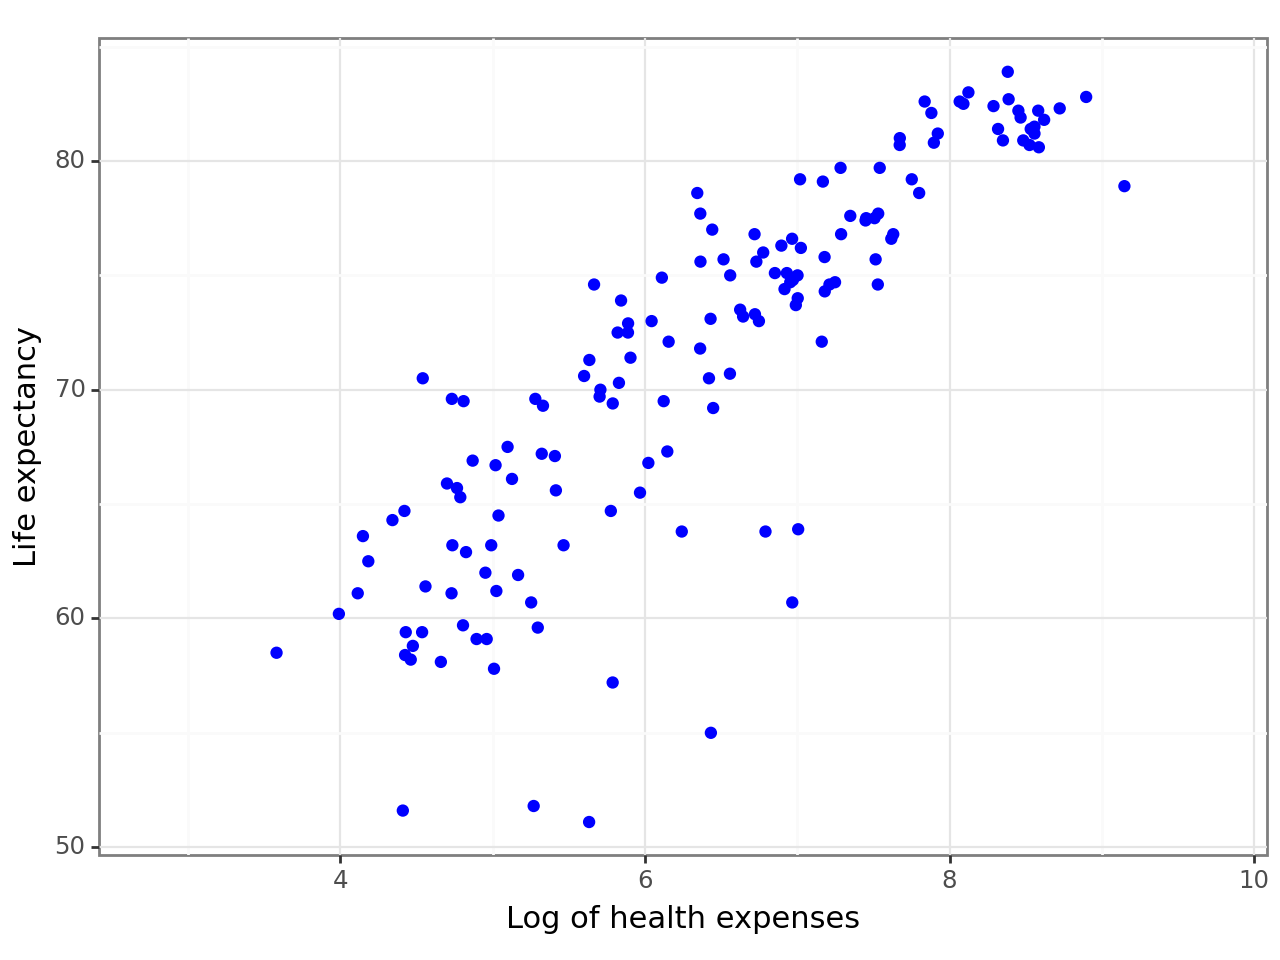

In [35]:
p3 = (
    ggplot(clean_data, aes(x="ln_healthexp", y="lifeexp"))
    + geom_point(color="blue")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[2.5, 10])
    + scale_y_continuous(expand=[0.01, 0.01], limits=[50, 85])
    + labs(x="Log of health expenses", y="Life expectancy")
    + theme_bw()
)
print(p3)

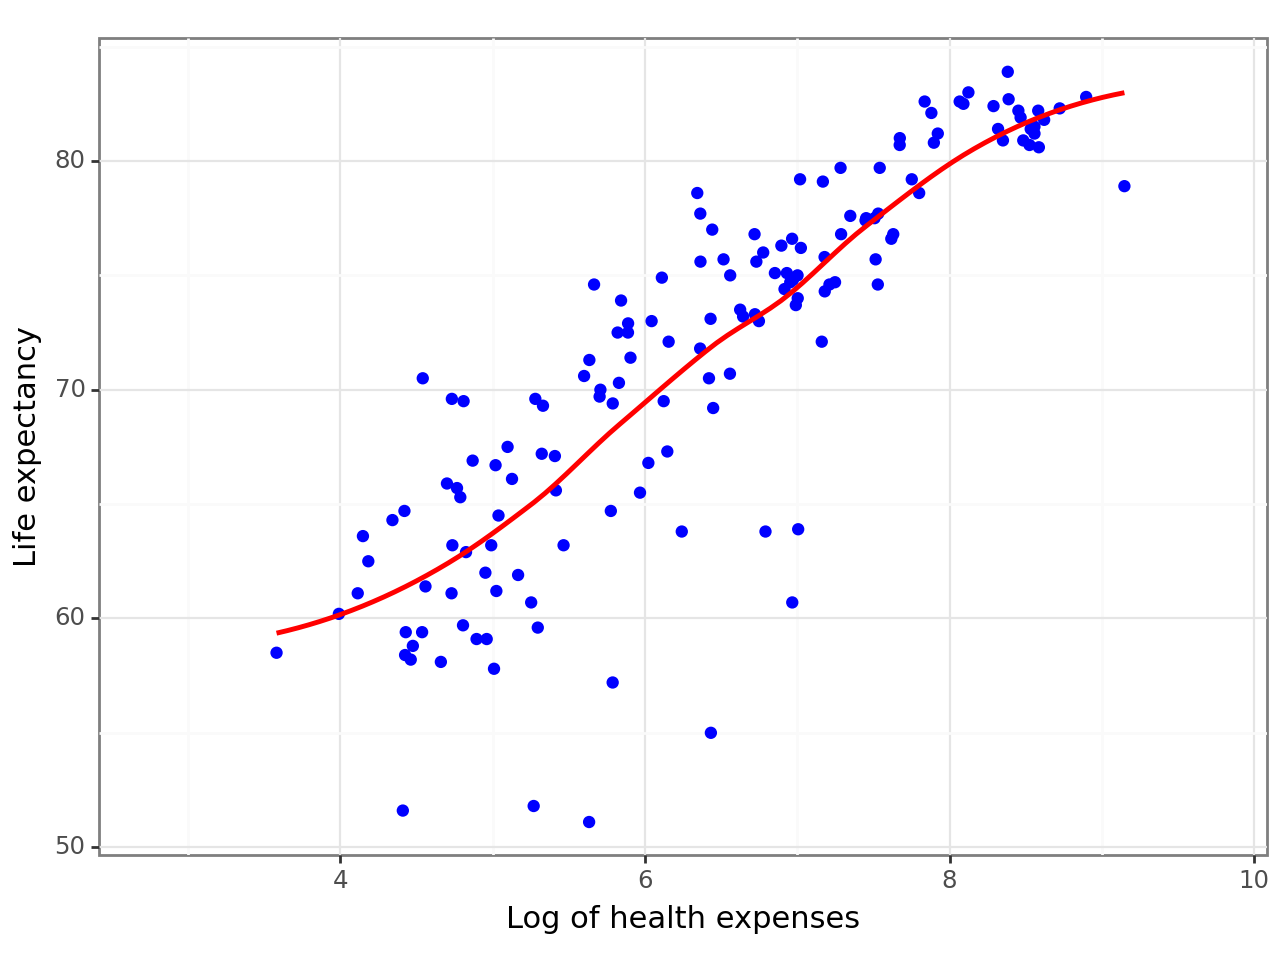

In [36]:
lowess2 = p3 + geom_smooth(method="loess", color="red", se=False)
print(lowess2)

In [37]:
# After log transformation, the relationship looks close to linear. This is what I will use and include it in the original model. (Although less steep in the beginning and flattening out at the end, linear regression is a good estimation)
reg4 = smf.ols(formula="lifeexp~gini + ln_healthexp", data=clean_data).fit(cov_type="HC1")
stargazer = Stargazer([reg1, reg4])
stargazer.rename_covariates({"lifeexp" : "Life expectancy", "gini" : "GINI index", "ln_healthexp" : "Log of health expenses", "Intercept": "Constant"})
stargazer

In [38]:
# All coefficients significant at 1%. GINI coefficient decreased a lot: from -0.438 to -0.171. In the new model countries with the same health expenses but with 1 unit higher GINI index have a 0.17 years lower life expectancy. 
# Countries with the same GINI index but with 1% higher health expenses have 0.04855 years higher life expectancy.
# R squared is fantastic with 0.754.

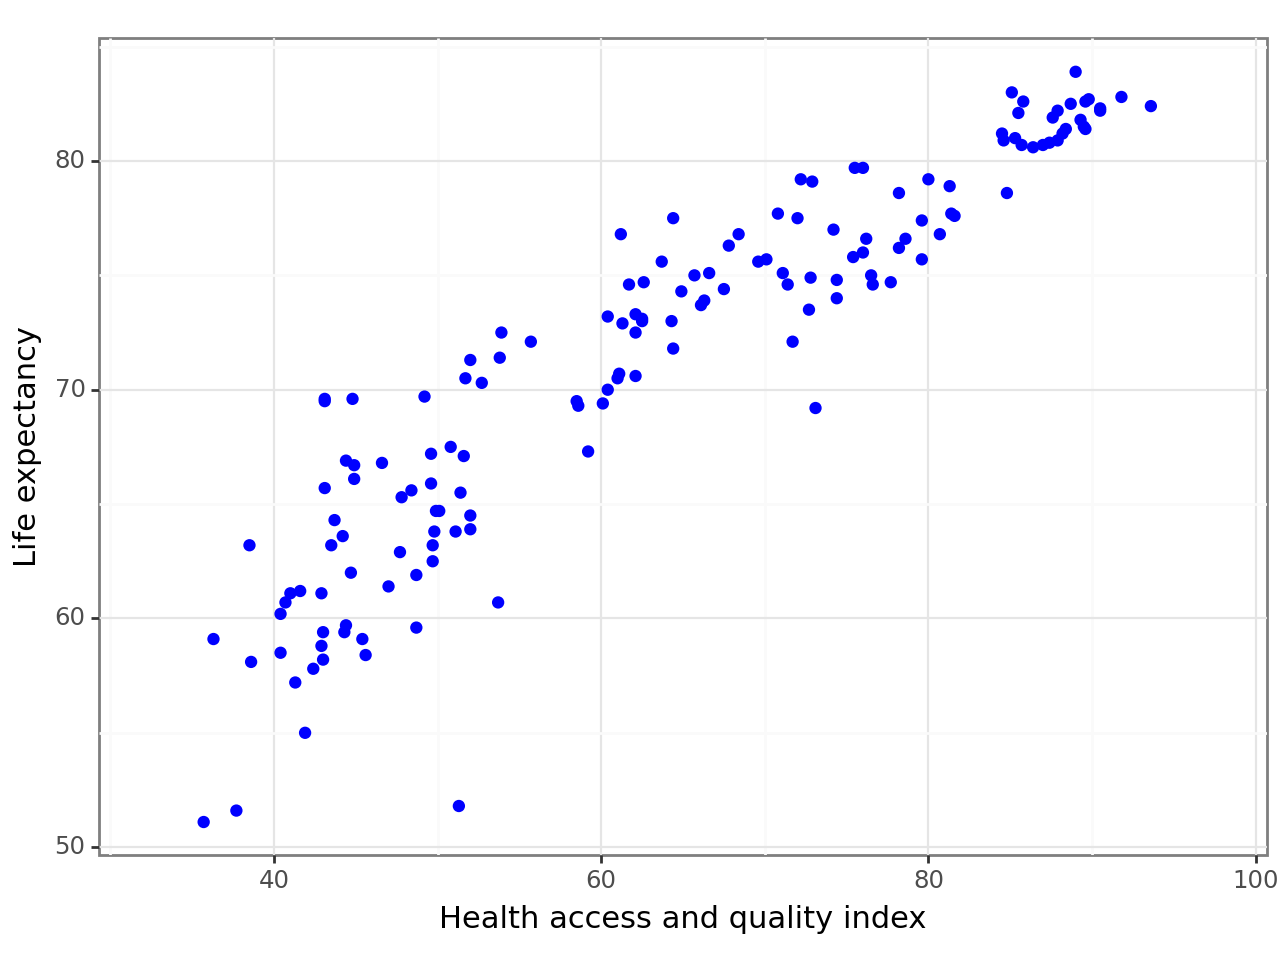

In [39]:
p4 = (
    ggplot(clean_data, aes(x="haq", y="lifeexp"))
    + geom_point(color="blue")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[30, 100])
    + scale_y_continuous(expand=[0.01, 0.01], limits=[50, 85])
    + labs(x="Health access and quality index", y="Life expectancy")
    + theme_bw()
)
print(p4)

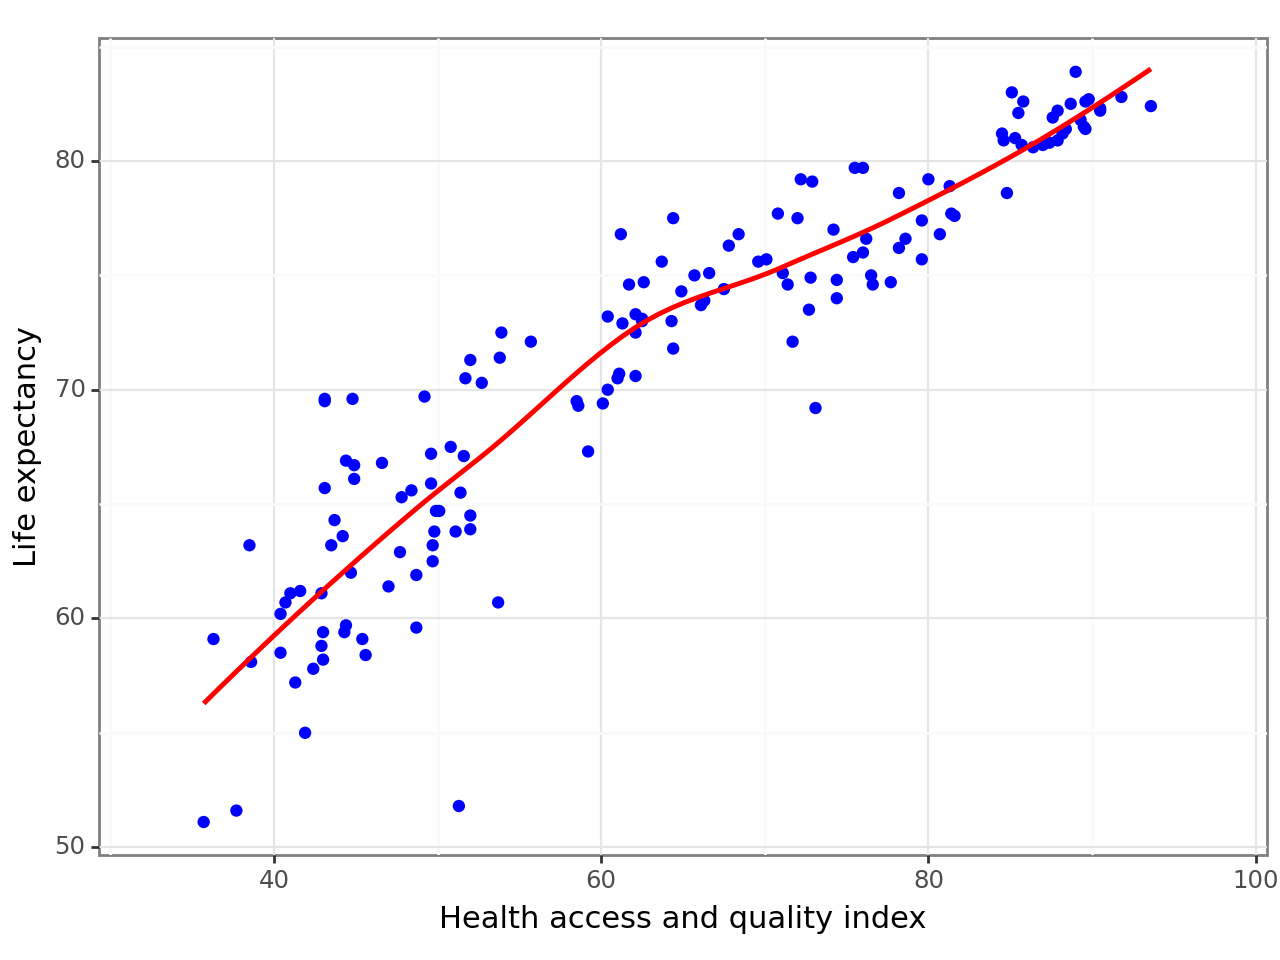

In [40]:
lowess3 = p4 + geom_smooth(method="loess", color="red", se=False)
print(lowess3)

In [41]:
# linear looks to be a good fit

reg5 = smf.ols(formula="lifeexp~gini + ln_healthexp + haq", data=clean_data).fit(cov_type="HC1")
stargazer = Stargazer([reg1, reg4, reg5])
stargazer.rename_covariates({"lifeexp" : "Life expectancy", "gini" : "GINI index", "ln_healthexp" : "Log of health expenses", "haq" : "Health access and quality index", "Intercept": "Constant"})
stargazer

#### After adding the 2nd control variable of the HAQ index, neither of the previous 2 are significant, but the HAQ is at 1%. The new model explains more than 85% of the variation in life expectancy, suggesting that life expectancy is not dependent on how the wealth of the nation is distrubuted. Furthermore, based on the results it is likely, that the effects of health expenses are already captured in the HAQ index's results, and adding them do not explain much on top of the HAQ. 
To test this we can check the association between HAQ and health expenses and check the effect of HAQ only on life expectancy.

In [42]:
df_corr = clean_data[["haq", "gini", "healthexp", "lifeexp"]]
df_corr
corr_matrix = df_corr.corr().round(2)
corr_matrix

,haq,gini,healthexp,lifeexp
haq,1.00,-0.46,0.78,0.92
gini,-0.46,1.00,-0.34,-0.42
healthexp,0.78,-0.34,1.00,0.69
lifeexp,0.92,-0.42,0.69,1.00


In [43]:
reg6 = smf.ols(formula= "haq ~ ln_healthexp", data=clean_data).fit(cov_type="HC1")
stargazer = Stargazer([reg6])
stargazer.rename_covariates({"lifeexp" : "Life expectancy", "gini" : "GINI index", "ln_healthexp" : "Log of health expenses", "haq" : "Health access and quality index", "Intercept": "Constant"})
stargazer

In [44]:
# HAQ and health expenses are indeed strongly associated with an R squared of 0.841, therefore adding one on top of the other adds little extra to our model.

In [45]:
reg7 = smf.ols(formula= "lifeexp ~ haq", data=clean_data).fit(cov_type="HC1")
reg8 = smf.ols(formula= "lifeexp ~ haq + gini", data=clean_data).fit(cov_type="HC1")
stargazer = Stargazer([reg1, reg4, reg5, reg7, reg8])
stargazer.rename_covariates({"lifeexp" : "Life expectancy", "gini" : "GINI index", "ln_healthexp" : "Log of health expenses", "haq" : "Health access and quality index", "Intercept": "Constant"})
stargazer

In [46]:
# It seems that the HAQ index on its own has the best explanatory power on life expectancy - how much is spent on healthcare also has an effect on life expectancy but only through an improvement on the HAQ index. Its additionl explanatory power is minor -
# this is visible in the R squared values and the fact that the health expenses coefficient is not significant.
# Lastly, it seems that while higher GINI indexes on their own seem to have been associated with higher life expectancy (see model 1 and 2), once we added the HAQ variable, this connection disappeared and became insignificant. 
# Therefore we can condlude that GINI index is not associated with different life expectencies if we control for health expenses and HAQ.

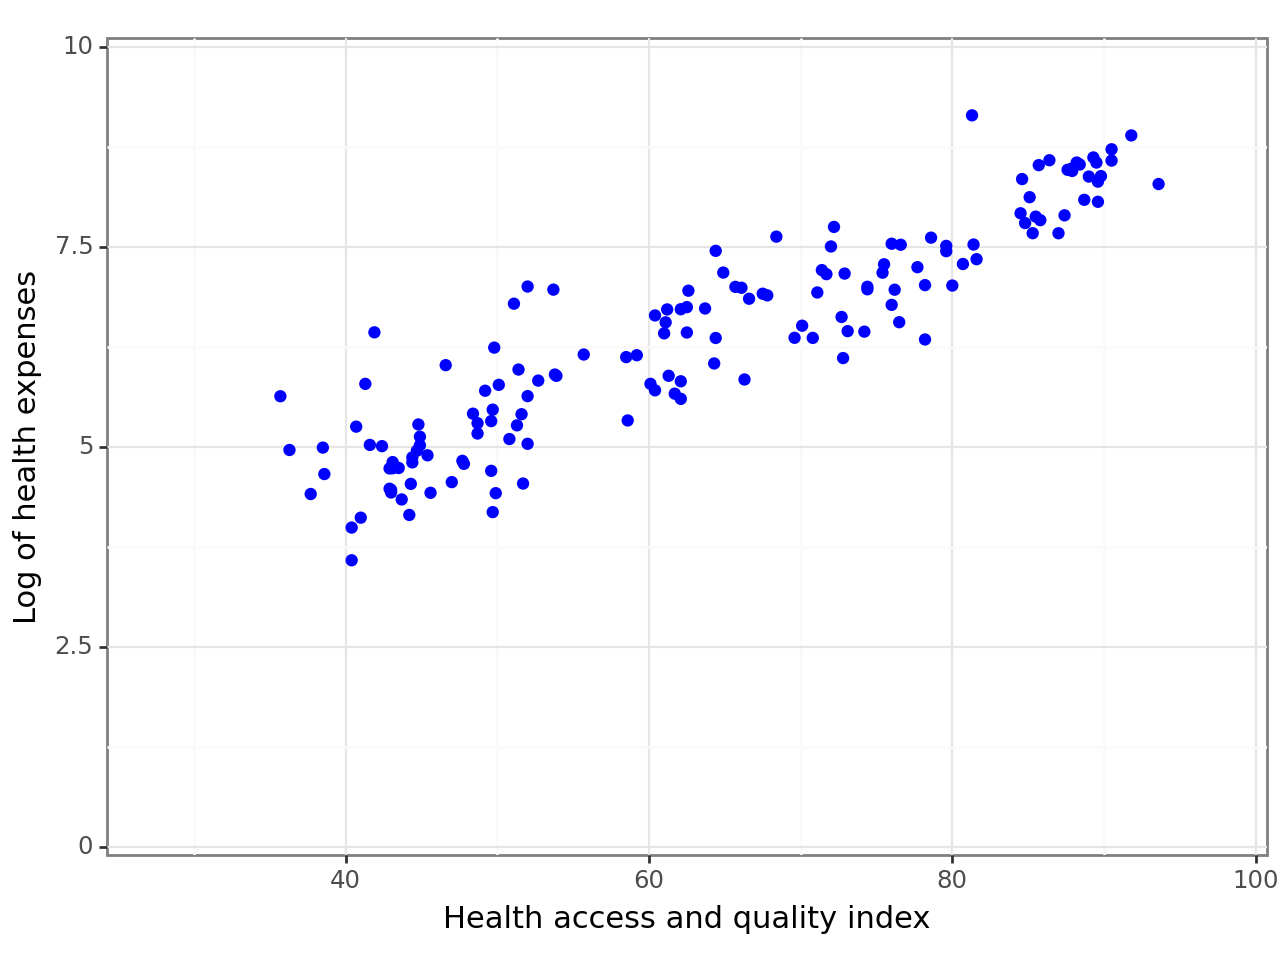

In [50]:
p5 = (
    ggplot(clean_data, aes(x="haq", y="ln_healthexp"))
    + geom_point(color="blue")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=[0.01, 0.01], limits=[25, 100])
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 10])
    + labs(x="Health access and quality index", y="Log of health expenses")
    + theme_bw()
)
print(p5)